**Q1.** Support Vector Machine: Since, not all machine learning problems are
binary classification problems, there are datasets where we have multiple classes.
Multi class classification can be seen in classifying handwritten MNIST digits,
multi class image classification and even the iris dataset.
1. Import the Dataset Download the iris flower dataset and import the
csv file.
2. Split the Dataset Split the dataset into 4 parts. Training data, Training
target, Test data and Test target. Split the data in such a way that the set
(Training Data, Training Target) has 75% of the total dataset and (Test
Data, Test Target) comprises of the rest of the dataset. Use scikit-learn
for this.

In [ ]:
import numpy as np
import pandas as pd
import math
import scipy.stats
from sklearn.model_selection import train_test_split

#     LOADING  THE DATASET

data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None) #loading dataset from given link
df=pd.DataFrame(data)
print('First 5 rows:')
print(df.head())
print()
print('Statistical description of the four features in the data:')
print(df.describe())

#     NORMALIZING THE DATASET

df_norm={}
for i in range(4):
  df_norm[i]= ( df[i] - min(df[i]) ) / ( max(df[i]) - min(df[i]) )
df_norm[4]=df[4]
df_norm=pd.DataFrame(df_norm)

#   SPLITTING INTO TRAIN AND TEST SET IN 75:25
train, test = train_test_split(df_norm, test_size=0.25, random_state=42, shuffle=True)
train_data=np.array(train.loc[:,0:3])
train_target=np.array(train.loc[:,4])
test_data=np.array(test.loc[:,0:3])
test_target=np.array(test.loc[:,4])

First 5 rows:
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa

Statistical description of the four features in the data:
                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


3. Training the SVM Train a SVM Classifier using scikit-learn. Train the
model using the Training Data and Training Target.
4. Testing the model Use the trained SVM Classifier to predict the labels
on the Test Data.

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(train_data,train_target)  #training the SVM
print('True labels')
print(test_target)
print('Predicted labels')
test_pred=clf.predict(test_data)
print(test_pred)

True labels
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa']
Predicted labels
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setos

5. Performance of model Use the predicted labels from the previous part
and the Training Target to create a Confusion Matrix. A confusion matrix
is a way to check whether the model has performed well or not on different
cases.
6. Accuracy Report the accuracy of the model from the confusion matrix.


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion Matrix')
print(confusion_matrix(test_target,test_pred))
print('Accuracy')
print(accuracy_score(test_target,test_pred))
print(classification_report(test_target, test_pred))

Confusion Matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Accuracy
1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



Also try the same procedure for the splitting ratio as 80% Train and 20%
Test Data.

In [ ]:
#   SPLITTING INTO TRAIN AND TEST SET  IN 80:20   
train, test = train_test_split(df_norm, test_size=0.2, random_state=42, shuffle=True)
train_data=np.array(train.loc[:,0:3])
train_target=np.array(train.loc[:,4])
test_data=np.array(test.loc[:,0:3])
test_target=np.array(test.loc[:,4])

clf=svm.SVC(kernel='linear')
clf.fit(train_data,train_target)
print('True labels')
print(test_target)
print('Predicted labels')
test_pred=clf.predict(test_data)
print(test_pred)
print('Confusion Matrix')
print(confusion_matrix(test_target,test_pred))
print('Accuracy')
print(accuracy_score(test_target,test_pred))
print(classification_report(test_target, test_pred))

True labels
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']
Predicted labels
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iri

**Q2.** Principal Component Analysis and Linear Discriminant Analysis
This is one of the most important topics that one can encounter in a ML course.
This is a feature reduction technique. Many times we have data that has a large
number of features (1000’s of them). It is not possible always to consider all
possible features and carry out the training. So we use a feature reduction
technique to make the same problem with less number of features. If we reduce
the features, will the model be efficient enough? The answer lies in the fact,
that we will choose features that are having the maximum variances.

1. Import the dataset Download the iris flower dataset and import it as a
csv file.
2. Visualize the Dataset There are 3 classes of iris flowers. Take all the 4
features and create plots pairwise. For example: Take feature1 and feature
2 and plot all the 150 samples in 3 different colors to visualize. You will
get a total of 6 different plots like this.

color_map
(array(['b', 'g', 'r'], dtype='<U1'), array([50, 50, 50]))


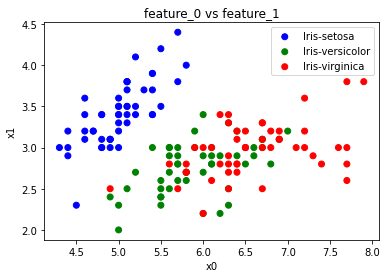

<Figure size 3600x2880 with 0 Axes>

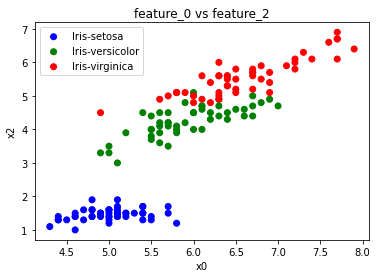

<Figure size 3600x2880 with 0 Axes>

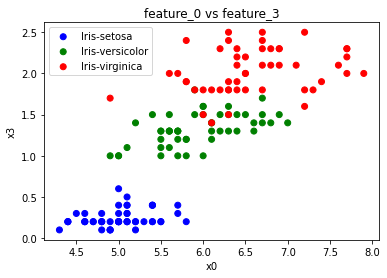

<Figure size 3600x2880 with 0 Axes>

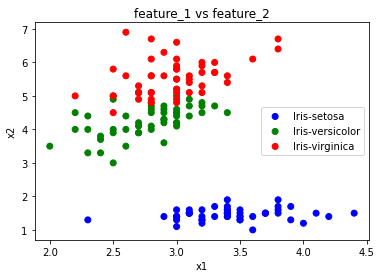

<Figure size 3600x2880 with 0 Axes>

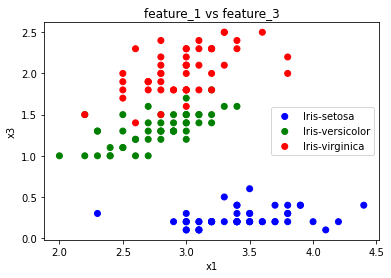

<Figure size 3600x2880 with 0 Axes>

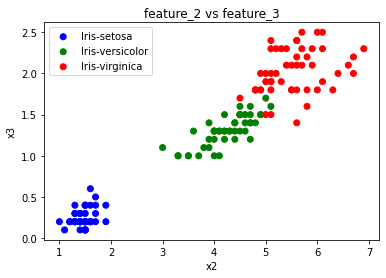

<Figure size 3600x2880 with 0 Axes>

In [2]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import scipy.stats
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

#     LOADING  THE DATASET

data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None) #loading dataset from given link
df=pd.DataFrame(data)

#     PLOTTING THE FEATURES PAIRWISE

#  creating a colour map for the 6 plots  
colours=['b','g','r']
color_map=[]
for i in range(150):  
  color_map.append(colours[int(i/50)])  # 50 points x 3 colours
print('color_map')
print(np.unique(color_map,return_counts=True))

for i in range(4):
  for j in range(i+1,4):
    for c in range(3):
      feat1=df.iloc[c*50:(c+1)*50,i]
      feat2=df.iloc[c*50:(c+1)*50,j]
      plt.scatter(feat1,feat2,c=color_map[c*50:(c+1)*50])
    plt.xlabel(f'x{i}')
    plt.ylabel(f'x{j}') 
    plt.legend(['Iris-setosa','Iris-versicolor','Iris-virginica'],loc='best')  
    plt.title(f'feature_{i} vs feature_{j}')
    plt.figure(figsize=(50,40))
    plt.show() 


3. Normalize the dataset Normalize the iris flower dataset for training the
model. Use min max normalization.

In [3]:
#     NORMALIZING THE DATASET

df_norm={}
for i in range(4):
  df_norm[i]= ( df[i] - min(df[i]) ) / ( max(df[i]) - min(df[i]) )
df_norm[4]=df[4]
df_norm=pd.DataFrame(df_norm)
print(df_norm)

            0         1         2         3               4
0    0.222222  0.625000  0.067797  0.041667     Iris-setosa
1    0.166667  0.416667  0.067797  0.041667     Iris-setosa
2    0.111111  0.500000  0.050847  0.041667     Iris-setosa
3    0.083333  0.458333  0.084746  0.041667     Iris-setosa
4    0.194444  0.666667  0.067797  0.041667     Iris-setosa
..        ...       ...       ...       ...             ...
145  0.666667  0.416667  0.711864  0.916667  Iris-virginica
146  0.555556  0.208333  0.677966  0.750000  Iris-virginica
147  0.611111  0.416667  0.711864  0.791667  Iris-virginica
148  0.527778  0.583333  0.745763  0.916667  Iris-virginica
149  0.444444  0.416667  0.694915  0.708333  Iris-virginica

[150 rows x 5 columns]


4. Mean and Covariance Matrix Calculate the Mean vector. The Mean
vector is the mean of all the features so it will be a 4X1 vector. Once you
calculate the Mean vector calculate the Covariance Matrix among the 4
features

In [4]:
x=df_norm.iloc[:,0:4]
x=np.array(x).T
u=np.mean(x,axis=1) #mean vector
u=np.reshape(u,(4,1))
print('Mean vector')
print(u)
print()
sigma=(1/149)*np.matmul((x-u),(x-u).T)  #covariance matrix
print('Covariance matrix:')
print(sigma)


Mean vector
[[0.4287037 ]
 [0.43916667]
 [0.46757062]
 [0.45777778]]

Covariance matrix:
[[ 0.05290845 -0.00454496  0.05996621  0.05982683]
 [-0.00454496  0.03263959 -0.02271983 -0.02048285]
 [ 0.05996621 -0.02271983  0.08943348  0.09155279]
 [ 0.05982683 -0.02048285  0.09155279  0.1011136 ]]


5. Eigen Decomposition Calculate the Eigen values and Eigen vectors of
the covariance matrix Σ. The Eigen Vectors denote the direction of spread
and the Eigen Values denote the variance among that direction.

In [5]:
lambd,v=np.linalg.eig(sigma)
print('Eigenvalues')
print(lambd)
print()
print('Eigenvectors')
print(v)

Eigenvalues
[0.23231168 0.03239279 0.00963728 0.00175337]

Eigenvectors
[[ 0.4252893  -0.42100611 -0.71434339  0.36276216]
 [-0.14612219 -0.90470509  0.33510219 -0.21877734]
 [ 0.61610511  0.06432645 -0.06825927 -0.78205964]
 [ 0.64667752  0.01116485  0.61054133  0.45708076]]


6. Principal Components Sort the Eigen values in descending order. Take
the first 2 Eigen Values and the corresponding Eigen Vectors.Create a
Projection Matrix P of size 4X2 using these vectors.

In [6]:
def Sort_Desc_Tuple(tup):  #sort the eigenvalues and eigenvectors in descending order of the eigenvalues
      
    
    lst = len(tup)  # getting length of list of tuples 
    for i in range(0, lst):  
          
        for j in range(0, lst-i-1):  
            if (tup[j][0] < tup[j + 1][0]):  
                temp = tup[j]  
                tup[j]= tup[j + 1]  
                tup[j + 1]= temp  
    return tup 
eig_list=[]
for i in range(4):
  eig_value=lambd[i]
  eig_vector=v[:,i]
  eig_list.append((eig_value,eig_vector))

tup=Sort_Desc_Tuple(eig_list)
print('Sorted list of (eigen_value,eigen_vector) pairs:')
print(tup)
print()

P=np.ndarray((4,2)) #projection matrix
P[:,0]=tup[0][1]
P[:,1]=tup[1][1]

print('The projection matrix:')
print(P)

Sorted list of (eigen_value,eigen_vector) pairs:
[(0.23231167806814884, array([ 0.4252893 , -0.14612219,  0.61610511,  0.64667752])), (0.032392786781702744, array([-0.42100611, -0.90470509,  0.06432645,  0.01116485])), (0.009637277634355757, array([-0.71434339,  0.33510219, -0.06825927,  0.61054133])), (0.0017533717639656116, array([ 0.36276216, -0.21877734, -0.78205964,  0.45708076]))]

The projection matrix:
[[ 0.4252893  -0.42100611]
 [-0.14612219 -0.90470509]
 [ 0.61610511  0.06432645]
 [ 0.64667752  0.01116485]]


7. Projecting to new feature space Project the original normalized dataset
using the matrix P to a new feature space such that the data has only 2
features. Use the relation:
Y = XxP
where Y is the new projected dataset with 2 features, X is the original
dataset with 4 features and P is the 4X2 projection matrix.

In [7]:
orig_data=np.array(df.iloc[:,0:4])
y=np.matmul(orig_data,P)          #projecting the original data
print('Projected dataset shape:')
print(np.shape(y))
print()
print(y)

Projected dataset shape:
(150, 2)

[[ 2.64943045 -5.221309  ]
 [ 2.63743369 -4.68475523]
 [ 2.46154088 -4.78792767]
 [ 2.55684519 -4.64249126]
 [ 2.5922893  -5.2696789 ]
 [ 3.03273541 -5.68796197]
 [ 2.51606577 -4.91921895]
 [ 2.68312425 -5.08230524]
 [ 2.43940125 -4.38378167]
 [ 2.61976423 -4.76990958]
 [ 2.80940332 -5.52211921]
 [ 2.6596769  -4.99167137]
 [ 2.530237   -4.64377111]
 [ 2.13276082 -4.45256599]
 [ 2.75085085 -5.98123112]
 [ 2.96404008 -6.27948164]
 [ 2.78629336 -5.71369255]
 [ 2.71409821 -5.22019252]
 [ 3.11026666 -5.72490978]
 [ 2.73187206 -5.4851714 ]
 [ 2.976461   -5.23784239]
 [ 2.81115203 -5.39358441]
 [ 2.17573154 -5.12700704]
 [ 3.05748968 -5.01772059]
 [ 2.84450844 -4.97237343]
 [ 2.80318364 -4.71399055]
 [ 2.87407027 -5.07363962]
 [ 2.7535699  -5.25697697]
 [ 2.7065716  -5.1729391 ]
 [ 2.64637241 -4.76862974]
 [ 2.70351356 -4.72025984]
 [ 2.98257548 -5.24847471]
 [ 2.60122883 -5.80091651]
 [ 2.71726065 -6.02300501]
 [ 2.61976423 -4.76990958]
 [ 2.52751716 -4.920

8. Final Visualization Plot the final reduced dataset Y with the 2 principal
components and visualize the result. Use 3 different colours for the 3
classes.

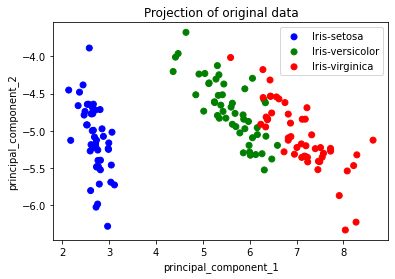

<Figure size 3600x2880 with 0 Axes>

In [8]:
#     PLOTTING THE FEATURES

#  creating a colour map for the 6 plots  
colours=['b','g','r']
color_map=[]
for i in range(150):  
  color_map.append(colours[int(i/50)])  # 50 points x 3 colours

for c in range(3):
  feat1=y[c*50:(c+1)*50,0]
  feat2=y[c*50:(c+1)*50,1]
  plt.scatter(feat1,feat2,c=color_map[c*50:(c+1)*50])
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2') 
plt.legend(['Iris-setosa','Iris-versicolor','Iris-virginica'],loc='best')  
plt.title('Projection of original data')
plt.figure(figsize=(50,40))
plt.show() 


Projected dataset shape:
(150, 2)


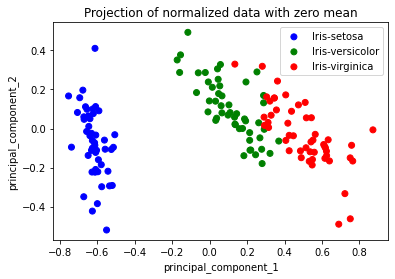

<Figure size 3600x2880 with 0 Axes>

In [9]:
# PLOTTING THE NORMALIZED DATA WITH ZERO MEAN

y=np.matmul((x-u).T,P)
print('Projected dataset shape:')
print(np.shape(y))
#print()
#print(y)

#     PLOTTING THE FEATURES

#  creating a colour map for the 6 plots  
colours=['b','g','r']
color_map=[]
for i in range(150):  
  color_map.append(colours[int(i/50)])  # 50 points x 3 colours

for c in range(3):
  feat1=y[c*50:(c+1)*50,0]
  feat2=y[c*50:(c+1)*50,1]
  plt.scatter(feat1,feat2,c=color_map[c*50:(c+1)*50])
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2') 
plt.legend(['Iris-setosa','Iris-versicolor','Iris-virginica'],loc='best')  
plt.title('Projection of normalized data with zero mean')
plt.figure(figsize=(50,40))
plt.show() 